# AML1 project: MINST - American Sign language

## Intro
The original MNIST dataset is widely use for image-based machine learning models. It is a image dataset of handwritten digits frm, so it has 10 classes and the entries store a numerical value for each pixel of the image.

The dataset we use in this project has the same format as the original MNIST one, but it contains b&w images of American Sign Language letter handgestures, representing multi-class problem of 24 classes of letters (excluding 9=J and 25=Z which require motion).

![image.png](american_sign_language.png)

### **The dataset**
The dataset format is highly similar to the original MNIST. It is already split in ```train``` and ```test``` set. Both datasets have enough entries to represent each label: classes from 0 to 25 map to each alphabetic letter from A to Z, the two only exemptions are J and Z which cannot be represented by an image because of gesture motions. 

Training set and testing set have, respectively, ```27455``` and ```7172``` cases and each case is associated to 785 features, which represent the 28x28 pixels of the greyscale image, and a label.

### **Aim of the project**
Give this 24-class classification problem, we will develop a model using Support Vector Machine which should correctly classify the greyscale American Sign Language images from 0-25 (excluding class 9 and 25 as stated before) based on the pixel values given as features.

## Project

### **Data inspection**

In [2]:
import numpy as np 
import pandas as pd 
import os

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

***Dimension of the datasets***
Let's import the data and check the dimension:

In [3]:
#import train data
train_data = pd.read_csv("sign_mnist_train.csv") 
print('dimension of train data: ', train_data.shape)
train_data.head()


dimension of train data:  (27455, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
#import test data
test_data = pd.read_csv("sign_mnist_test.csv")
print('dimension of Test data: ', test_data.shape)
test_data.head()

dimension of Test data:  (7172, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


***Missing values***
Checking for missing values in the ```train``` and ```test``` datasets:

In [4]:
def null_val(data):
    for x in data.isnull().sum():
        if x != 0:
            return "there's a null value"
    return 'no missing values'    

In [5]:
null_val(train_data)

'no missing values'

In [6]:
null_val(test_data)

'no missing values'

In [7]:
#Statistics about the dataset
train_data.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.318813,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,...,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,7.287552,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,...,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,128.000000,128.000000,125.500000
50%,13.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,19.000000,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [8]:
test_data.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,...,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000
mean,11.247351,147.532627,150.445761,153.324317,155.663413,158.169688,160.790853,162.282766,163.649191,165.589515,...,138.546570,145.539598,150.744980,155.638873,158.893196,159.648494,158.162019,157.672755,156.664250,154.776771
std,7.446712,43.593144,41.867838,40.442728,39.354776,37.749637,36.090916,36.212636,35.885378,33.721876,...,64.501665,65.132370,65.760539,65.565147,65.200300,65.499368,66.493576,66.009690,67.202939,68.285148
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,122.000000,126.000000,130.000000,134.000000,137.000000,141.000000,144.000000,145.000000,147.000000,...,90.000000,95.000000,99.000000,105.000000,113.000000,113.750000,113.000000,115.000000,111.000000,106.750000
50%,11.000000,154.000000,157.000000,159.000000,161.000000,163.000000,165.000000,166.000000,168.000000,169.000000,...,137.000000,155.000000,168.000000,177.000000,181.000000,182.000000,181.000000,180.000000,180.000000,179.000000
75%,18.000000,178.000000,179.000000,181.000000,182.000000,184.000000,185.000000,186.000000,187.000000,187.000000,...,195.000000,200.000000,204.250000,207.000000,207.000000,208.000000,207.000000,205.000000,206.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [9]:
# To sum up: 

print("Dimensions: ",test_data.shape, "\n")
print(test_data.info())
test_data.head()

Dimensions:  (7172, 785) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB
None


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [10]:
print("Dimensions: ",train_data.shape, "\n")
print(train_data.info())
train_data.head()

Dimensions:  (27455, 785) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB
None


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


**Inspection of the classes**
Let's inspect the classes and their frequencies in the ```training set```

In [11]:
order = list(np.sort(train_data['label'].unique()))
print(order)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


Text(0.5, 1.0, 'Frequency of alphabet classes')

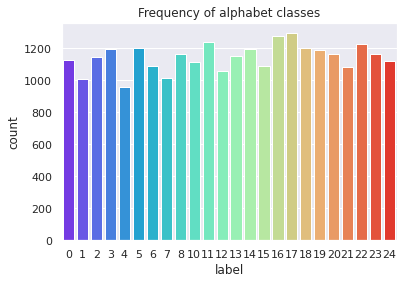

In [12]:
## Plotting the number of class and counts in the datasets
plt.plot(figure = (16,10))

g = sns.countplot( train_data["label"], palette = 'rainbow')
plt.title('Frequency of alphabet classes')

#train_data.label.astype('category').value_counts()

**Printing samples**
Let's print the first 15 entries of the ```training dataset```:

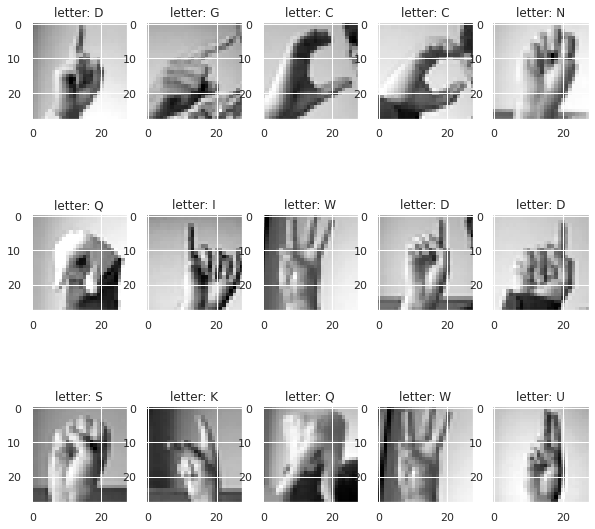

In [13]:
f, ax = plt.subplots(3,5) 
f.set_size_inches(10, 10)
k = 0
for i in range(3):
    for j in range(5):
        ax[i,j].imshow(train_data.iloc[k, 1:].values.reshape(28, 28) , cmap = "gray")
        title = chr(train_data.iloc[k].label + 65)
        ax[i,j].set_title('letter: '+str(title))
        k += 1
    #plt.tight_layout()

### **Data Preparation**

Let's conduct some data preparation steps before the modeling step. We will probably need to scale and normalize the data, let's verify it: 


In [5]:
from sklearn.preprocessing import scale

In [6]:
# average feature values
mean_train = round(train_data.drop('label', axis=1).mean(), 2)
mean_test = round(test_data.drop('label', axis=1).mean(), 2)

Text(0.5, 1.0, "Distribution of each feature's average - Test set")

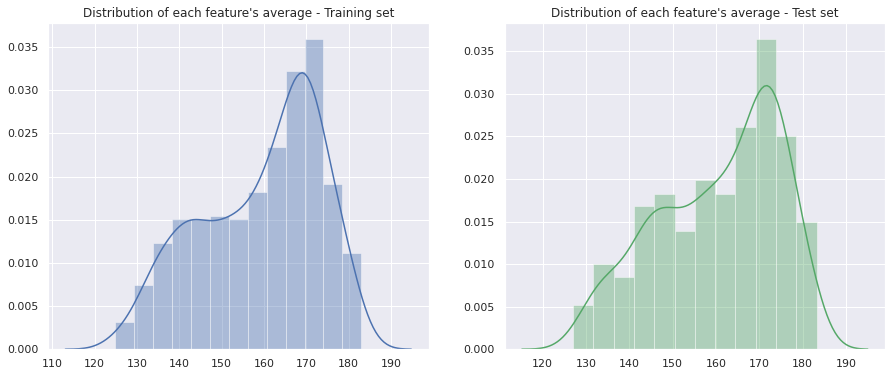

In [16]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 6))
trplt = sns.distplot(mean_train, ax=axs[0])
trplt.set_title('Distribution of each feature\'s average - Training set')
teplt = sns.distplot(mean_test, ax=axs[1], color='g')
teplt.set_title('Distribution of each feature\'s average - Test set')

Text(0.5, 1.0, 'Distribution of test data')

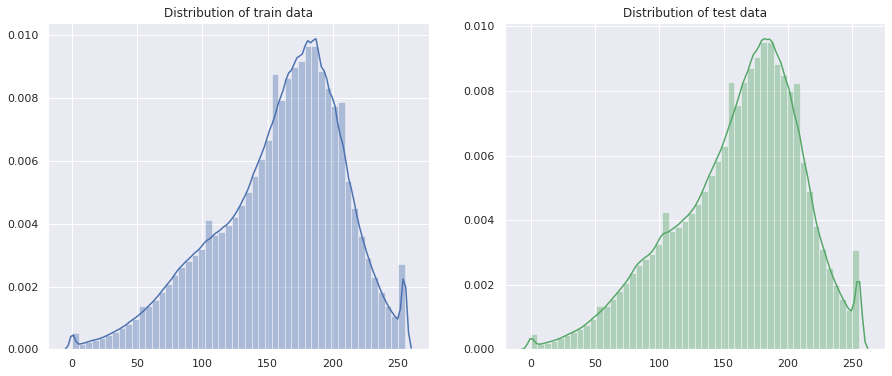

In [17]:
# distribution of train data feature
fig, axs = plt.subplots(ncols=2, figsize=(15, 6))
raw_tr = sns.distplot(train_data.drop('label', axis=1), ax=axs[0])
raw_tr.set_title('Distribution of train data')
raw_te = sns.distplot(test_data.drop('label', axis=1), ax=axs[1], color = 'g')
raw_te.set_title('Distribution of test data')

The data needs to be scaled and normalized in order to be used for building the model.

In [27]:
## Separating the X and Y variable

y_train = train_data['label']
y_test = test_data['label']

## Dropping the variable 'label' from X variable 
X_train_raw = train_data.drop(columns = 'label')
X_test_raw = test_data.drop(columns = 'label')

In [8]:
## Normalization (over the max: 255)

X_train_norm = X_train_raw/255.0
X_test_norm = X_test_raw/255.0

print("X_train:", X_train_norm.shape)
print("X_test:", X_test_norm.shape)

X_train: (27455, 784)
X_test: (7172, 784)


Text(0.5, 1.0, 'Distribution of normalized training data')

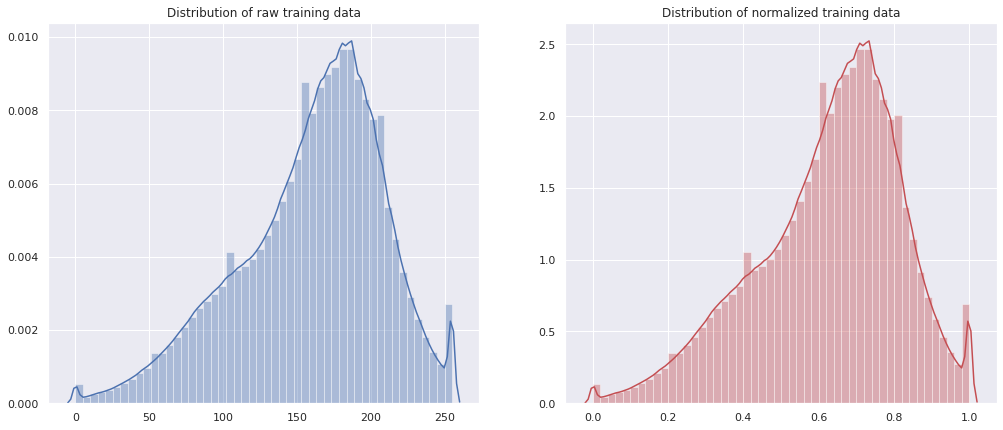

In [20]:
fig, axs = plt.subplots(ncols=2, figsize=(17, 7))
raw = sns.distplot(X_train_raw, ax=axs[0])
raw.set_title('Distribution of raw training data')
norm = sns.distplot(X_train_norm, ax=axs[1], color='r')
norm.set_title('Distribution of normalized training data')

In [9]:
X_test_raw.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,...,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000
mean,147.532627,150.445761,153.324317,155.663413,158.169688,160.790853,162.282766,163.649191,165.589515,167.311350,...,138.546570,145.539598,150.744980,155.638873,158.893196,159.648494,158.162019,157.672755,156.664250,154.776771
std,43.593144,41.867838,40.442728,39.354776,37.749637,36.090916,36.212636,35.885378,33.721876,32.361682,...,64.501665,65.132370,65.760539,65.565147,65.200300,65.499368,66.493576,66.009690,67.202939,68.285148
min,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,122.000000,126.000000,130.000000,134.000000,137.000000,141.000000,144.000000,145.000000,147.000000,149.000000,...,90.000000,95.000000,99.000000,105.000000,113.000000,113.750000,113.000000,115.000000,111.000000,106.750000
50%,154.000000,157.000000,159.000000,161.000000,163.000000,165.000000,166.000000,168.000000,169.000000,170.000000,...,137.000000,155.000000,168.000000,177.000000,181.000000,182.000000,181.000000,180.000000,180.000000,179.000000
75%,178.000000,179.000000,181.000000,182.000000,184.000000,185.000000,186.000000,187.000000,187.000000,188.000000,...,195.000000,200.000000,204.250000,207.000000,207.000000,208.000000,207.000000,205.000000,206.000000,204.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [22]:
X_test_norm.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,...,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000
mean,0.578559,0.589983,0.601272,0.610445,0.620273,0.630552,0.636403,0.641762,0.649371,0.656123,...,0.543320,0.570744,0.591157,0.610349,0.623111,0.626073,0.620243,0.618325,0.614370,0.606968
std,0.170954,0.164188,0.158599,0.154332,0.148038,0.141533,0.142010,0.140727,0.132243,0.126909,...,0.252948,0.255421,0.257884,0.257118,0.255687,0.256860,0.260759,0.258862,0.263541,0.267785
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.039216,0.000000,0.000000,0.000000,0.023529,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.478431,0.494118,0.509804,0.525490,0.537255,0.552941,0.564706,0.568627,0.576471,0.584314,...,0.352941,0.372549,0.388235,0.411765,0.443137,0.446078,0.443137,0.450980,0.435294,0.418627
50%,0.603922,0.615686,0.623529,0.631373,0.639216,0.647059,0.650980,0.658824,0.662745,0.666667,...,0.537255,0.607843,0.658824,0.694118,0.709804,0.713725,0.709804,0.705882,0.705882,0.701961
75%,0.698039,0.701961,0.709804,0.713725,0.721569,0.725490,0.729412,0.733333,0.733333,0.737255,...,0.764706,0.784314,0.800980,0.811765,0.811765,0.815686,0.811765,0.803922,0.807843,0.800000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
# scaling the features

X_train = scale(X_train_norm)
X_test = scale(X_test_norm)

Text(0.5, 1.0, 'Distribution of Scaled and Normalized Test set')

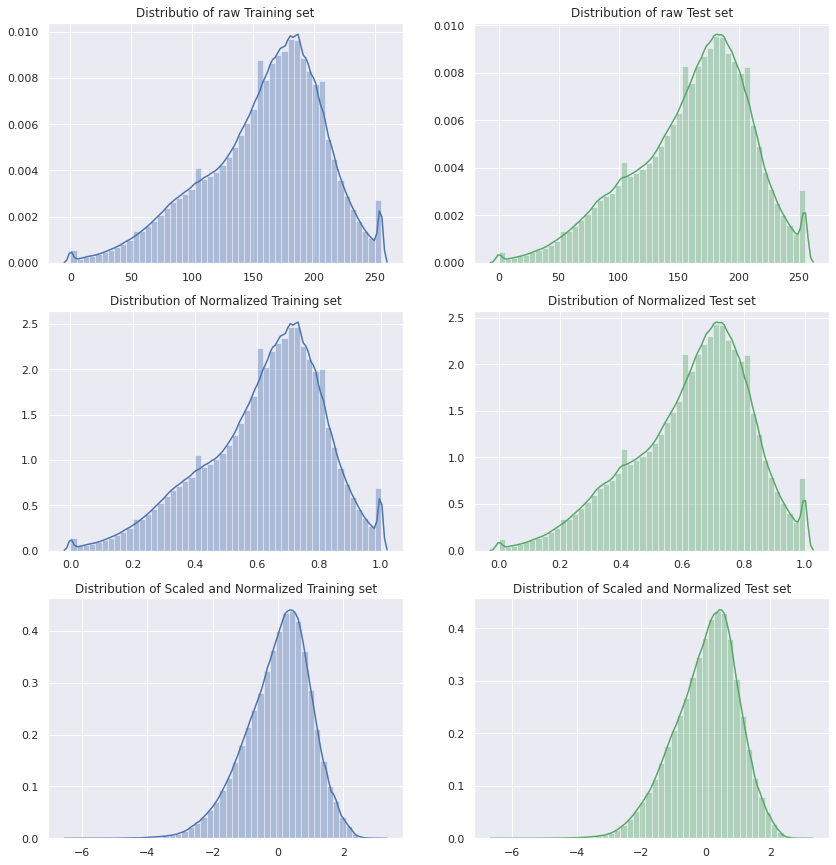

In [27]:
fig, axs = plt.subplots(3, 2, figsize=(14, 15))
rntr = sns.distplot(X_train_raw, ax=axs[0][0])
rntr.set_title('Distributio of raw Training set')
rnte = sns.distplot(X_test_raw, ax=axs[0][1], color = 'g')
rnte.set_title('Distribution of raw Test set')
nortr = sns.distplot(X_train_norm, ax=axs[1][0])
nortr.set_title('Distribution of Normalized Training set')
norte = sns.distplot(X_test_norm, ax=axs[1][1], color = 'g')
norte.set_title('Distribution of Normalized Test set')        
xtr = sns.distplot(X_train, ax=axs[2][0])
xtr.set_title('Distribution of Scaled and Normalized Training set')
xte = sns.distplot(X_test, ax=axs[2][1], color = 'g')
xte.set_title('Distribution of Scaled and Normalized Test set')

### **Model Building**

We will build three models:
- SVM linear model
- SVM non linear (rbf with default parameters)
- SVM non linear (rbf with optimized parameters)

In [11]:
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#### **Linear model**

In [29]:
model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# predict
y_pred_lin = model_linear.predict(X_test)

In [30]:
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred_lin), "\n")

# confusion matrix
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred_lin))

accuracy: 0.8107919687674289 

[[331   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0 408   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0  23   0   0   0   0]
 [  0   0 308   0   0   2   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0 245   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0 498   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0  13   0   0 205   0   0   0   0  21   0   0   0   0   0   0   0
    8   0   0   0   0   0]
 [  0   0   0   0   0   0 318   1   0   0   0   0   0   0   0  10   0   0
   19   0   0   0   0   0]
 [  0   0   0   0   9   0  20 392   0   0   0   0   0   0   0   0   0   0
    1  14   0   0   0   0]
 [  8   0   0   0   0   0   0   0 233   5   0   0   0   0   0   0  21   0
    0   0   0   0   0  21]
 [  0   0   0   3   0  46   0   0  11 194   0   0   0   0   

#### **Non linear - RBF Kernel**

We will use a non linear model based on RBF Kernel, we won't change the parameters.

In [25]:
# model w\ default parameters
non_linear_model = SVC(kernel='rbf') 

# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred_nonlin = non_linear_model.predict(X_test)

In [26]:
# confusion matrix and accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred_nonlin), "\n")
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred_nonlin))

accuracy: 0.8471834913552705 

[[331   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0 423   0   0   0   0   0   0   0   9   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0 310   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0 245   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0 490   0   0   0   0   0   0   0   0   0   0   0   0   8
    0   0   0   0   0   0]
 [  0   0  13   0   0 205   0   0   0   0  28   0   0   0   0   0   0   0
    1   0   0   0   0   0]
 [  0   0   0   0   0   0 325   1   0   0   0   0   0   0   0   3   0   0
   19   0   0   0   0   0]
 [  0   0   0   0   0   0  20 413   0   0   0   0   0   0   0   0   0   0
    1   2   0   0   0   0]
 [  0   0   0   0   0  15   0   0 247   0   0   0   0   0   0   0   0   0
    2   0   1   0   0  23]
 [  0   0   0   0   0   0   0   0  21 221   0   0   0   0   

**Grid Search: Hyperparameter Tuning**.
Since we did not change values for C and gamma, we will now tune the model to find the ideal values for these parameters that perform optimal on RBF kernel. We'll use 5-fold cross validation.

In [19]:
# KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 10)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [5,10]}]

model = SVC(kernel="rbf")

model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True,
                        n_jobs = -1)      

# fit
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 188.8min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': [5, 10], 'gamma': [0.01, 0.001, 0.0001]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [20]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1884.057922,27.736913,261.534918,8.209118,5,0.01,"{'C': 5, 'gamma': 0.01}",0.996358,0.998361,0.995629,...,0.996940,0.000917,4,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,0.000000
1,358.527103,29.343509,118.389386,7.031537,5,0.001,"{'C': 5, 'gamma': 0.001}",1.000000,1.000000,0.999818,...,0.999964,0.000073,1,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,0.000000
2,378.595885,22.187388,169.455067,20.844826,5,0.0001,"{'C': 5, 'gamma': 0.0001}",0.993262,0.993990,0.996540,...,0.994646,0.001356,6,0.995993,0.995493,0.99572,0.996039,0.996904,0.996030,0.000480
3,1349.940610,59.755431,180.094960,27.178048,10,0.01,"{'C': 10, 'gamma': 0.01}",0.996358,0.998361,0.995629,...,0.996940,0.000917,4,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,0.000000
4,264.402848,29.346157,84.683891,7.658569,10,0.001,"{'C': 10, 'gamma': 0.001}",1.000000,1.000000,0.999818,...,0.999964,0.000073,1,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,0.000000
5,251.247113,26.657631,122.423468,24.176121,10,0.0001,"{'C': 10, 'gamma': 0.0001}",1.000000,0.999089,1.000000,...,0.999781,0.000353,3,0.999954,0.999772,1.00000,0.999954,0.999954,0.999927,0.000079


Let's plot the results:
we will generate three plots for each gamma parameter tested (```0.01```, ```0.001```, ```0.0001```) to observe the tendency of the C parameter at ```5``` and at ```10```. 

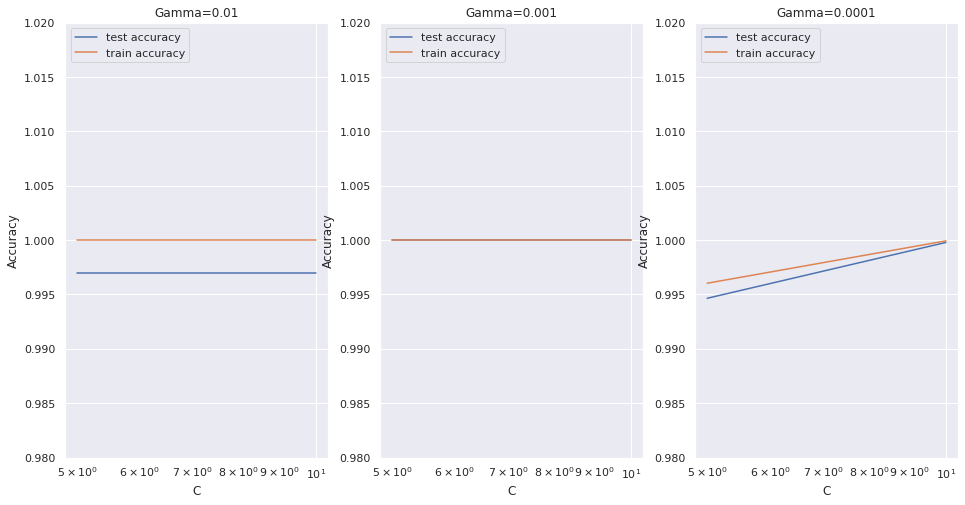

In [23]:
# converting C to int type
cv_results['param_C'] = cv_results['param_C'].astype('int') # 

plt.figure(figsize=(16,8))

# subplot 1
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.98, 1.02])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.98, 1.02])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.98, 1.02])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [21]:
# optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print('The hyperparameters {0} gave the best test score of {1}.'.format(best_hyperparams, best_score))

The hyperparameters {'C': 5, 'gamma': 0.001} gave the best test score of 0.9999635767619741.


#### **Final model**

Given the best hyperparameters (```C=5``` and ```gamma=0.001```) we can procede to build our optimized model.

In [22]:
# optimized model
model1 = SVC(C=5, gamma=0.001, kernel="rbf")

model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")

accuracy 0.8448131622978249 

[[331   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0 426   0   0   0   0   0   0   0   6   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0 310   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0 245   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0 495   0   0   0   0   0   0   0   0   0   0   0   0   3
    0   0   0   0   0   0]
 [  0   0  14   0   0 205   0   0   0   0  28   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0 326   0   0   0   0   0   0   0   0   3   0   0
   19   0   0   0   0   0]
 [  0   0   0   0   0   0  20 398   0   0   0   0   0   0   0   0   0   0
    1  17   0   0   0   0]
 [  0   0   0   0   0  16   0   0 243   0   0   0   0   0   0   0   3   0
    2   0   2   0   0  22]
 [  0   0   0   2   0   0   0   0  28 210   0   0   0   0   0

### **Conclusion**

given the following:

/| linear model | NL model | tuned NL model
---------|--------------|----------|---------------
**Accuracy** | 0.8108 | 0.8472  |0.8448 

The accuracy achieved using a non-linear kernel (0.84 ca.) is much higher than the one achieved with a linear one (0.81 ca.). Therefore we can conclude that the problem is non-linear. The gridsearch has not improved the performance.